### 1. For PTEN


#### Import all the necessary packages


In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

%matplotlib inline


In [2]:
X = pd.read_csv('trainReadyData/PTENX.csv')
X


,AKT1|207,BAD|572,BECN1|8678,CA9|768,CCND1|595,CDKN1B|1027,FTH1|2495,HIF1A|3091,IL6|3569,KLK3|354,MAP1LC3B|81631,MT2A|4502,MTOR|2475,PTGS2|5743,SLC2A1|6513,SLC30A1|7779,VEGFA|7422
0,11.671783,10.331095,10.330399,8.786293,11.123063,10.840378,15.024419,12.438820,3.467749,0.000000,11.760332,12.561393,10.611280,6.797676,11.905623,8.659774,12.723702
1,11.361381,10.131210,10.266701,11.680693,10.709868,9.026173,16.389493,13.119283,11.171136,0.000000,12.123821,15.306795,10.072728,10.378798,12.638665,8.692564,13.159528
2,12.262058,10.344795,10.195539,8.973686,11.079129,11.572258,15.032451,12.340602,6.207085,-0.244172,11.957079,11.650502,10.048771,7.186326,11.345759,7.359500,11.828677
3,11.995195,10.219912,10.333986,5.625884,11.137253,11.410401,14.232891,13.120130,6.027643,0.000000,11.471675,12.230678,10.717105,6.842500,11.735757,7.664320,11.604906
4,11.774395,11.011662,10.600298,10.208368,11.100662,10.846159,16.334449,12.128655,7.144285,0.000000,11.626989,13.323079,9.705211,7.297532,11.567655,8.639451,13.999798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,12.001832,10.449952,10.350913,7.023437,10.750616,10.626369,14.830816,11.978475,6.093245,0.000000,11.688075,12.098653,10.413475,5.969256,11.221073,7.700662,12.583022
137,11.891185,10.296958,10.565382,8.936019,9.494196,10.247973,14.773544,12.318858,5.642592,0.000000,11.652444,15.672665,10.246413,6.667682,12.738220,6.716592,12.943887
138,11.200209,10.683629,10.477150,8.178603,10.765598,11.322884,14.255659,10.943869,2.859671,0.000000,11.886304,12.760193,10.710462,5.817447,11.623525,8.041878,13.264488
139,12.258220,10.581927,10.184426,8.162077,11.163443,10.560895,14.469103,12.152434,2.819423,0.000000,11.358587,12.772848,10.804321,7.920966,11.505461,7.729521,13.638809


In [3]:
# Check if there is any missing values
X.isnull().sum()


AKT1|207          0
BAD|572           0
BECN1|8678        0
CA9|768           0
CCND1|595         0
CDKN1B|1027       0
FTH1|2495         0
HIF1A|3091        0
IL6|3569          0
KLK3|354          0
MAP1LC3B|81631    0
MT2A|4502         0
MTOR|2475         0
PTGS2|5743        0
SLC2A1|6513       0
SLC30A1|7779      0
VEGFA|7422        0
dtype: int64

In [4]:
y = pd.read_csv('trainReadyData/PTENy.csv')
y


,Class
0,0
1,1
2,0
3,0
4,0
...,...
136,1
137,0
138,0
139,1


In [5]:
y.value_counts()


Class
0        97
1        44
dtype: int64

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

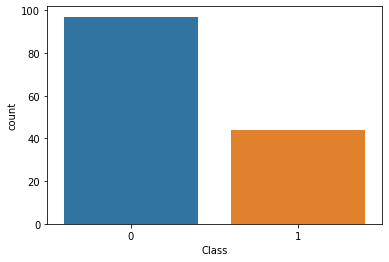

In [6]:
sns.countplot(y['Class'])


In [7]:
# Split Datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [8]:
# Applying standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(112, 17)
(29, 17)
(112, 1)
(29, 1)


# Logistic Regression


In [91]:
logReg = LogisticRegression(penalty='l2', C=0.1)


In [92]:
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)


/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [93]:
# Lets see how well our model performs
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Print Accuracy
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.59      0.94      0.73        17
           1       0.50      0.08      0.14        12

    accuracy                           0.59        29
   macro avg       0.55      0.51      0.44        29
weighted avg       0.55      0.59      0.49        29

[[16  1]
 [11  1]]
0.5862068965517241


### AUC Curve


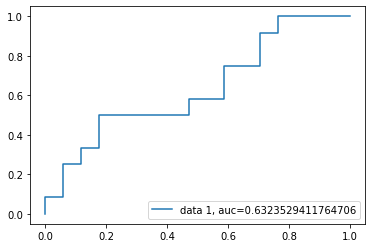

In [94]:
y_pred_proba = logReg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


### ROC Curve


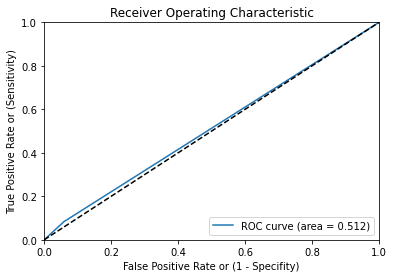

In [95]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


### Learning Curve


In [84]:
train_sizes, train_scores, validation_scores = learning_curve(
    logReg, X_train, y_train, train_sizes=np.logspace(-1, 0, 20))

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:1471: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 15 instead of 20).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_tra

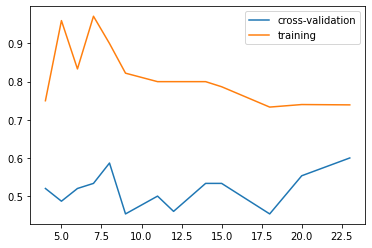

In [85]:
plt.plot(train_sizes, validation_scores.mean(axis=1), label='cross-validation') 
plt.plot(train_sizes, train_scores.mean(axis=1), label='training') 
plt.legend()
plt.show()

## Tuning Lambda

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

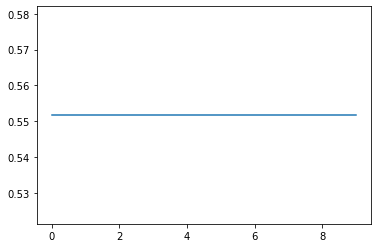

In [56]:
# Tuning lambda
accuracy = []
for i in range(1, 100, 10):
    log_Regression = LogisticRegression(C=i)
    log_Regression.fit(X_train, y_train)
    pred_log = log_Regression.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred_log))

# print(accuracy)
plt.plot(accuracy)


# Random Forest Classifier


In [98]:
rfc = RandomForestClassifier(n_estimators=85)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)


<ipython-input-98-d8715c7c21db>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [99]:
# Lets see how well our model performs
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.64      0.94      0.76        17
           1       0.75      0.25      0.38        12

    accuracy                           0.66        29
   macro avg       0.70      0.60      0.57        29
weighted avg       0.69      0.66      0.60        29

[[16  1]
 [ 9  3]]


In [100]:
# Print Accuracy
print(accuracy_score(y_test, pred_rfc))


0.6551724137931034


### ROC Curve

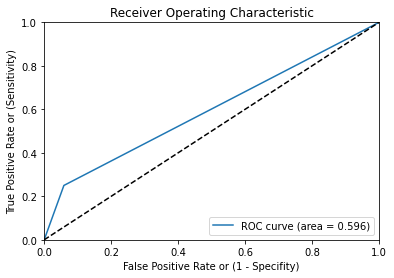

In [103]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, pred_rfc)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

### Learning Curve

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataCon

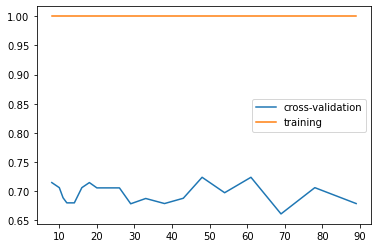

In [104]:
train_sizes, train_scores, validation_scores = learning_curve(rfc, X_train, y_train, train_sizes=np.logspace(-1, 0, 20))

plt.plot(train_sizes, validation_scores.mean(axis=1), label='cross-validation') 
plt.plot(train_sizes, train_scores.mean(axis=1), label='training') 
plt.legend()
plt.show()


# SVM Classifier


In [87]:
clf = svm.SVC()

clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)


/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [88]:
# Lets see how well our model performs
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))


              precision    recall  f1-score   support

           0       0.59      1.00      0.74        17
           1       0.00      0.00      0.00        12

    accuracy                           0.59        29
   macro avg       0.29      0.50      0.37        29
weighted avg       0.34      0.59      0.43        29

[[17  0]
 [12  0]]


/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Learning Curve

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

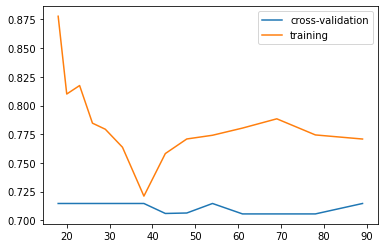

In [89]:
train_sizes, train_scores, validation_scores = learning_curve(clf, X_train, y_train, train_sizes=np.logspace(-1, 0, 20))

plt.plot(train_sizes, validation_scores.mean(axis=1), label='cross-validation') 
plt.plot(train_sizes, train_scores.mean(axis=1), label='training') 
plt.legend()
plt.show()


In [90]:
print(accuracy_score(y_test, pred_clf))

0.5862068965517241


# Neural Network


In [19]:
mlpc = MLPClassifier(hidden_layer_sizes=(30, 10), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)


/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [20]:
# Lets see how well our model performs
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))


              precision    recall  f1-score   support

           0       0.68      0.76      0.72        17
           1       0.60      0.50      0.55        12

    accuracy                           0.66        29
   macro avg       0.64      0.63      0.63        29
weighted avg       0.65      0.66      0.65        29

[[13  4]
 [ 6  6]]


In [21]:
print(accuracy_score(y_test, pred_mlpc))


0.6551724137931034
